# Ориентированные графы

В этом ноутбуке мы посмотрим на примеры работы с ориентированными графами

In [1]:
# Задаем граф

import networkx as nx

G = nx.DiGraph()

G.add_edge('A','B')
G.add_edges_from([('B','C'), ('C','A'), ('C','D'), ('C','E'),('D','E'),('F','C')])


nodes=list(G.nodes())
edges=list(G.edges())

print("Список вершин:",nodes)
print("Список ребер:",edges)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Число вершин:",num_nodes)
print("Число ребер:",num_edges)

Список вершин: ['A', 'B', 'C', 'D', 'E', 'F']
Список ребер: [('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D'), ('C', 'E'), ('D', 'E'), ('F', 'C')]
Число вершин: 6
Число ребер: 7


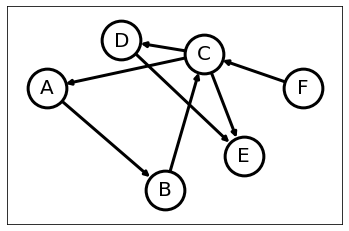

In [2]:
# Рисуем граф

import matplotlib.pyplot as plt

pos = {'A': (1, 1.5), 'B': (4, 0), 'C': (5, 2), 'D': (2.9, 2.2), 'E': (6, 0.5), 'F': (7.5, 1.5)}

def draw_G(G, axis=False, pos=None):
    options = {
        "font_size": 20,
        "node_size": 1500,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 3,
        "width": 3,
    }

    if axis:
        plt.axis([0, 8.5, -0.5, 2.7])
    nx.draw_networkx(G, pos, **options)
    plt.show()
    
draw_G(G, True, pos)

In [3]:
# Ищем степень вершины

print("Степень вершины:",G.degree('C'))
print("Входная степень вершины:",G.in_degree('C'))
print("Исходящая степень вершины:",G.out_degree('C'))

Степень вершины: 5
Входная степень вершины: 2
Исходящая степень вершины: 3


In [4]:
# Ищем соседей

print("Что выдает G[v]:",list(G['C']))

print("А вот соседи по входящим ребрам:",list(G.pred['C']))

Что выдает G[v]: ['A', 'D', 'E']
А вот соседи по входящим ребрам: ['B', 'F']


In [5]:
# Проверяем достижимость

nx.has_path(G,'D','A')

False

In [6]:
# Проверяем связность

# G.add_edges_from([('E','F'),('F','A')])

# draw_G(G, True, pos)

nx.is_strongly_connected(G)

# G.remove_edges_from([('E','F'),('F','A')])

False

Ниже мы реализуем поиск в данном ориентированном графе либо стока, либо цикла.

В целом, для этого достаточно начать ходить по графу из любой вершины до тех пор, пока мы либо не придем в сток, либо не посетим одну и ту же вершину дважды. Но для такого решения нам нужно хранить пройденные вершины, что может потребовать памяти линейной по сравнению с размером графа.

Мы построим решение эффективнее с точки зрения памяти, в нем нам потребуется память, линейная по длине цикла, который мы найдем. 

Сначала мы отдельно реализуем проверку вершины на то, является ли она стоком. 

Затем мы реализуем функцию, которая находит вершину, которая либо является стоком, либо лежит на цикле. Для этого достаточно для каждой вершины выбрать фиксированное исходящее ребро и переходить по этим ребрам n раз, где n — число вершин в графе.

Наконец, затем мы реализуем функцию, которая находит в графе либо сток, либо цикл. Для этого воспользуемся предыдущей функцией, и если она возвращает вершину на цикле, то мы проходим по циклу пока не попадем в начальную вершину второй раз, параллельно запоминая вершины цикла.

In [12]:
# В этом блоке нужно реализовать проверку вершины на то, является ли она стоком


def sink(G, v):
    # Добавьте здесь ваше решение
    if len(list(G[v])) == 0:
        return True
    return False
    

# v = 'C'
# v = 'E'
print(f'Вершина {v} является стоком: {sink(G, v)}')



Вершина E является стоком: True


C


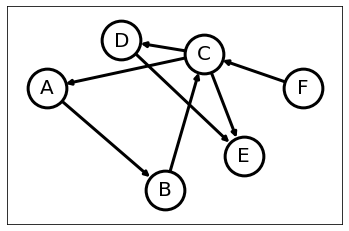

In [27]:
# В этом блоке нужно реализовать функцию, которая по данному графу и данной вершине находит вершину, достижимую из данной, либо лежащую на цикле, либо являющуюся стоком
visited = set()
def find_cycle_or_sink(G, v):
    # Добавьте здесь ваше решение
    if sink(G, v) == False and v not in visited:
        visited.add(v)
        for u in list(G[v]):
            find_cycle_or_sink(G, u)
        return list(visited)[-1]
    else:
        return v

print(find_cycle_or_sink(G, 'F'))

draw_G(G, True, pos)

In [ ]:
# В этом блоке нужно реализовать функцию, которая по данному графу и данной вершине, лежащей на цикле, выдает этот цикл

def build_cycle(G, v):
    cycle = [ v ]
    # Добавьте здесь ваше решение
    
    return cycle

v = find_cycle_or_sink(G, 'C')
if sink(G, v):
    print(f'Сток: {v}')
else:
    print(f'Цикл: {build_cycle(G, v)}')